In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Reading the data

In [2]:
df = pd.read_csv('winequality-white.csv', delimiter=';')
red_wine = pd.read_csv('winequality-red.csv',delimiter=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


mean square error:  0.47743450598987613


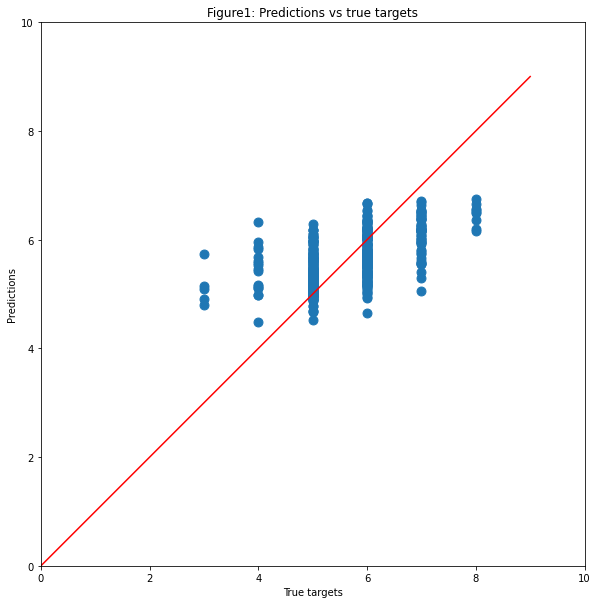

In [4]:
import warnings
warnings.filterwarnings('ignore')

## (a) Randomly splitting the data into a training and test set.


n=len(red_wine)
split=int(n*0.7)  
indices=np.arange(n)
np.random.shuffle(indices)


train_red=red_wine.iloc[indices[:split],:]
test_red=red_wine.iloc[indices[split:],:]


##  (b) Fitting a linear regression to the Data.

train_red_X=train_red.iloc[:,:-1].values
train_red_X=np.insert(train_red_X,0,1,axis=1)
train_red_t=train_red.iloc[:,-1:].values
red_w=np.linalg.inv(train_red_X.transpose().dot(train_red_X))\
.dot(train_red_X.transpose()).dot(train_red_t)


test_red_X=test_red.iloc[:,:-1].values
test_red_X=np.insert(test_red_X,0,1,axis=1)
test_red_t=test_red.iloc[:,-1:].values
predictions=test_red_X.dot(red_w)


## (c) Making a scatter plot of the predictions versus true targets.

plt.figure(figsize=(20,10))
plt.title('Figure1: Predictions vs true targets')
plt.xlabel('True targets')
plt.ylabel('Predictions')     
plt.xlim(0,10)
plt.ylim(0, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(test_red_t,predictions,s=80,marker='o')
plt.plot(np.arange(10),np.arange(10),color='r')


mean_error= np.mean(np.square(predictions-test_red_t))
print ("mean square error:  " +str(mean_error))


# Initial visual analysis

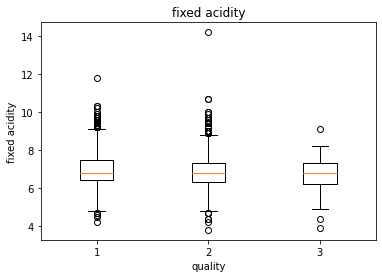

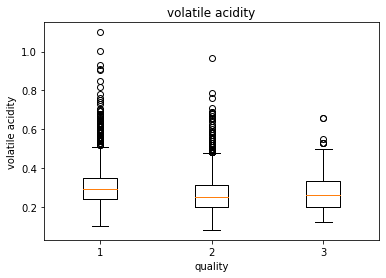

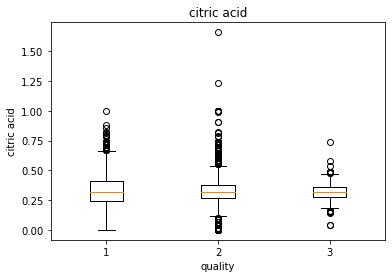

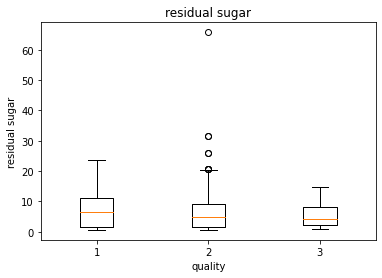

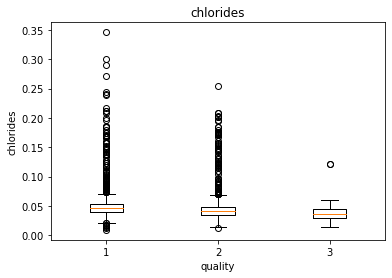

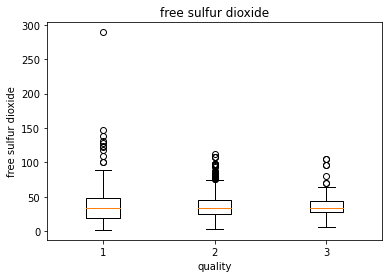

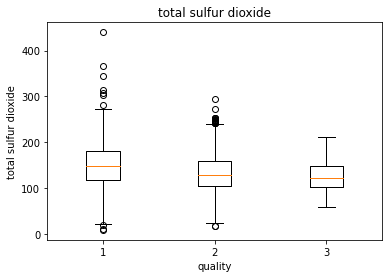

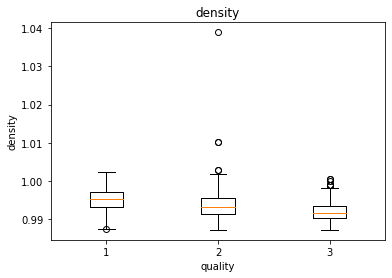

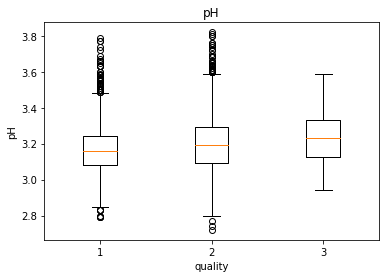

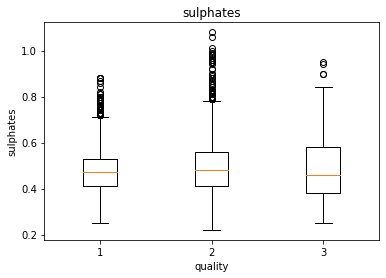

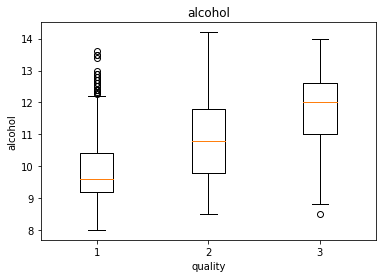

In [14]:
for label in df.columns[:-1]:
# for label in ['alcohol']:
    plt.boxplot([df[df['quality']==i][label] for i in range(0, 3)])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.savefig('imgs/'+'black'.join(label.split(' ')))
    plt.show()

# Gathering the training and testing data

In [6]:
# Since the numbers 3-9 don't really mean much, lets map these to low(0), mid(1), and high(2)
bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [7]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [8]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [9]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


# K Nearest Neighbors Classifier

In [10]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))
cross_val = cross_val_score(estimator=n3, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

0.7292016806722689


In [11]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(x_train, y_train)
pred_n5 = n5.predict(x_test)
print(classification_report(y_test, pred_n5))
cross_val = cross_val_score(estimator=n5, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       321
           1       0.76      0.82      0.79       624
           2       0.33      0.11      0.17        35

    accuracy                           0.72       980
   macro avg       0.58      0.51      0.52       980
weighted avg       0.71      0.72      0.71       980

0.7225618508272874


# Random Forest Classifier

In [12]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       321
           1       0.84      0.91      0.87       624
           2       1.00      0.46      0.63        35

    accuracy                           0.83       980
   macro avg       0.88      0.70      0.75       980
weighted avg       0.83      0.83      0.83       980

0.8085690798058354


# Decision Tree Classifier

In [13]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       321
           1       0.79      0.79      0.79       624
           2       0.39      0.46      0.42        35

    accuracy                           0.73       980
   macro avg       0.61      0.63      0.62       980
weighted avg       0.73      0.73      0.73       980

0.7366055117699254
